# Risk Adjusted Performance Metrics (Sharpe Ratio)

## Sharpe Ratio & Risk Free Asset Definition

$$
SharpeRatio = \frac{PortReturn - RFR}{PortRisk} 
$$

- RFR : As an approximation usually used the annual yield of government issued bond

In [24]:
risk_free_return = 0.0635 #indonesia 5 years gov bond coupon rate 
risk_free_rate = 0 # as government bond will almost never default this is the 0 is always the risk free rate 
rf = [risk_free_return, risk_free_rate]

In [25]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

In [26]:
port = pd.DataFrame()
tickers = ['ITMG.jk', 'MEDC.jk', 'ADRO.jk', 'AMRT.jk', 'MPMX.jk', 'APIC.jk', 'HEXA.jk', 'MFIN.jk', 'UNTR.jk', 'MBAP.jk', 'BYAN.jk', 'MTDL.jk', 'BSSR.jk','ADMF.jk','INCO.jk','ARNA.jk']
for ticker in tickers:
    port[ticker] = wb.get_data_yahoo(ticker, start = '2018-04-01', end = '2023-03-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Portfolio Analysis With Sharpe Ratio

### Recreating 100K Random Portfolios

In [27]:
def annual_return(return_df) : 
    summary = return_df.agg(['mean', 'std']).T
    summary.columns = ['return', 'risk']
    summary['return'] = summary['return'] * 250
    summary['risk'] = summary['risk'] * 250**0.5
    return summary

ret = port.pct_change().dropna()
annual_ret = annual_return(ret)

In [28]:
port_amount = len(port.columns)
nop = 100_000

np.random.seed(123) #just to make sure it consistenly generated random number
matrix = np.random.random(port_amount * nop).reshape(nop,port_amount)
norm_port = matrix / matrix.sum(axis = 1, keepdims = True)

port_ret = ret.dot(norm_port.T)
summary = annual_return(port_ret)

summary

,return,risk
0,0.323060,0.173773
1,0.294160,0.162821
2,0.301314,0.173373
3,0.341502,0.173323
4,0.285041,0.195410
...,...,...
99995,0.303462,0.217263
99996,0.262693,0.182620
99997,0.299112,0.190763
99998,0.315449,0.205607


### Caclulating Sharpe Ratio

In [32]:
annual_ret['sharpe'] = (annual_ret['return'].sub(rf[0])) / annual_ret['risk']
annual_ret.sort_values('sharpe', ascending = False)

,return,risk,sharpe
BYAN.jk,0.796599,0.518369,1.414242
ARNA.jk,0.323322,0.279515,0.929544
AMRT.jk,0.419133,0.427828,0.831252
HEXA.jk,0.328193,0.331509,0.798448
MBAP.jk,0.346407,0.384378,0.736012
MTDL.jk,0.367132,0.433384,0.700608
MPMX.jk,0.356179,0.445415,0.657093
BSSR.jk,0.406111,0.523921,0.653936
APIC.jk,0.202286,0.248486,0.558528
MFIN.jk,0.248591,0.359311,0.515126


In [30]:
summary['sharpe']= (summary['return'].sub(rf[0]))/summary['risk']
summary

,return,risk,sharpe
0,0.323060,0.173773,1.493673
1,0.294160,0.162821,1.416647
2,0.301314,0.173373,1.371690
3,0.341502,0.173323,1.603958
4,0.285041,0.195410,1.133725
...,...,...,...
99995,0.303462,0.217263,1.104477
99996,0.262693,0.182620,1.090751
99997,0.299112,0.190763,1.235104
99998,0.315449,0.205607,1.225391


In [33]:
summary.describe()

,return,risk,sharpe
count,100000.000000,100000.000000,100000.000000
mean,0.313451,0.187890,1.339084
std,0.023143,0.013266,0.172523
min,0.223812,0.145142,0.750564
25%,0.296775,0.178603,1.217500
50%,0.313516,0.187202,1.336468
75%,0.329706,0.196418,1.457019
max,0.438796,0.264566,2.072441


 ### Visualizing Sharpe Ratio

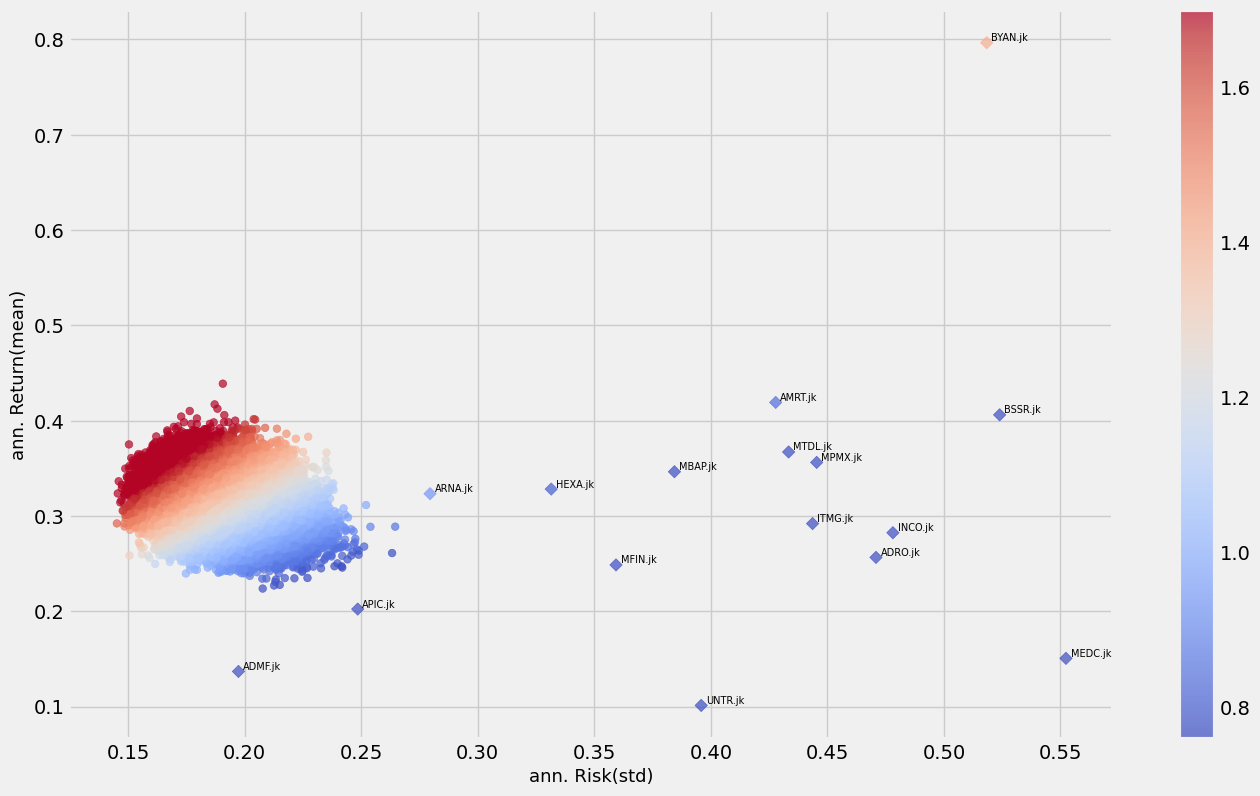

In [42]:
plt.figure(figsize = (15,9))
plt.scatter(summary.loc[:, "risk"], summary.loc[:, "return"], s = 30,
            c =summary.loc[:,'sharpe'],cmap ='coolwarm', vmin = 0.76, vmax = 1.7, alpha = 0.7)
plt.colorbar()
plt.scatter(annual_ret.loc[:, "risk"], annual_ret.loc[:, "return"], s = 40, marker = "D",
            c =annual_ret.loc[:,'sharpe'],cmap ='coolwarm', vmin = 0.76, vmax = 1.7, alpha = 0.7)
for i in annual_ret.index:
    plt.annotate(i, xy = ((annual_ret.loc[i, 'risk'] + 0.002, annual_ret.loc[i, 'return'] + 0.002)), size = 7)
plt.xlabel('ann. Risk(std)', fontsize = 13)
plt.ylabel('ann. Return(mean)', fontsize = 13)
plt.show()